In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [2]:
# Load the dataset
excel_file_path = 'Roughness.xlsx'

sheet_index = 6
data= pd.read_excel(excel_file_path, sheet_name=sheet_index)

data

,Power(W),Scanning Speed,Intial_Ra,Final_Ra,Pattern,Track_width(mm)
0,100,540,0.2497,2.8220,Bi-directional,3.41052
1,100,720,0.2497,0.4890,Bi-directional,3.24120
2,100,900,0.2497,0.2700,Bi-directional,3.12060
3,150,540,0.2497,0.3400,Bi-directional,3.64760
4,150,720,0.2497,3.3630,Bi-directional,3.34190
5,150,900,0.2497,1.1100,Bi-directional,3.47870
6,200,540,0.2497,0.5460,Bi-directional,3.50020
7,200,720,0.2497,2.3300,Bi-directional,3.19220
8,200,900,0.2497,1.2190,Bi-directional,3.20910
9,100,540,0.4058,1.0620,Bi-directional,2.89930


In [3]:
# One-Hot Encode 'Pattern' column
data = pd.get_dummies(data, columns=['Pattern'])

data

,Power(W),Scanning Speed,Intial_Ra,Final_Ra,Track_width(mm),Pattern_Bi-directional,Pattern_Squre,Pattern_Uni-directional
0,100,540,0.2497,2.8220,3.41052,1,0,0
1,100,720,0.2497,0.4890,3.24120,1,0,0
2,100,900,0.2497,0.2700,3.12060,1,0,0
3,150,540,0.2497,0.3400,3.64760,1,0,0
4,150,720,0.2497,3.3630,3.34190,1,0,0
5,150,900,0.2497,1.1100,3.47870,1,0,0
6,200,540,0.2497,0.5460,3.50020,1,0,0
7,200,720,0.2497,2.3300,3.19220,1,0,0
8,200,900,0.2497,1.2190,3.20910,1,0,0
9,100,540,0.4058,1.0620,2.89930,1,0,0


In [4]:
import pandas_profiling
from pandas_profiling import ProfileReport

C:\Users\pavan\AppData\Local\Temp\ipykernel_19888\671441926.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [5]:
report = ProfileReport(data)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
data.columns


Index(['Power(W)', 'Scanning Speed', 'Intial_Ra', 'Final_Ra',
       'Track_width(mm)', 'Pattern_Bi-directional', 'Pattern_Squre',
       'Pattern_Uni-directional'],
      dtype='object')

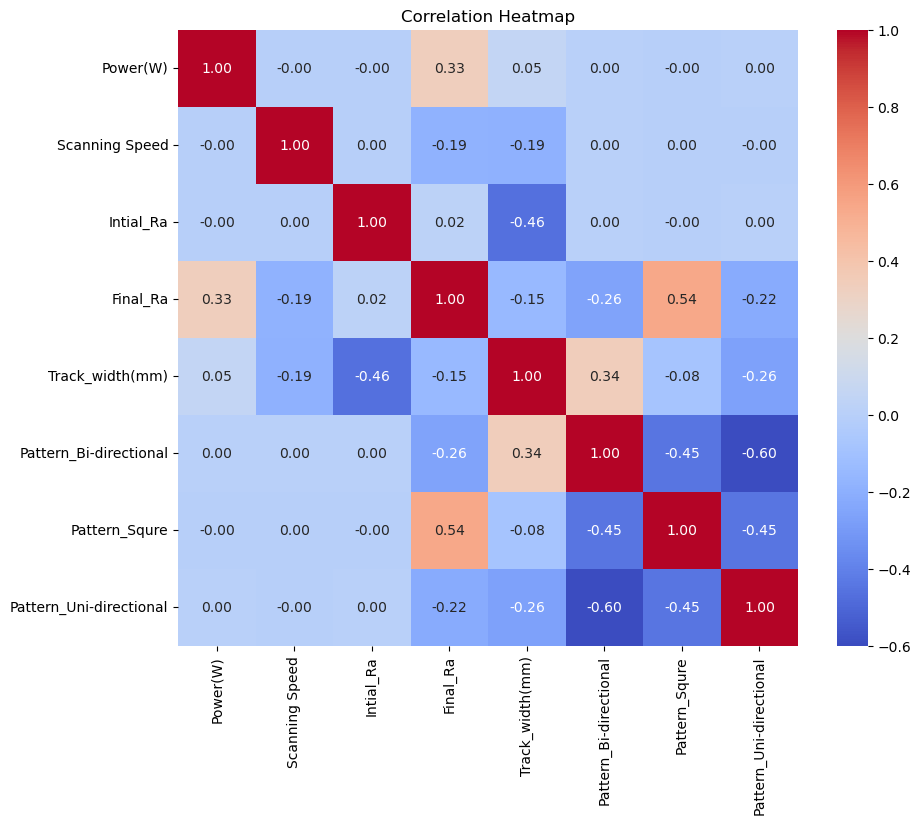

In [18]:
import seaborn as sns
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Select Features and Target Variables
features = ['Power(W)', 'Scanning Speed', 'Intial_Ra', 'Pattern_Bi-directional', 'Pattern_Squre','Pattern_Uni-directional']
target_ra = 'Final_Ra'
target_width = 'Track_width(mm)'



In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train_ra, y_test_ra, y_train_width, y_test_width = train_test_split(
    data[features], data[target_ra], data[target_width], test_size=0.2, random_state=42
)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [9]:
# Initialize and train the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train_ra)
    y_pred_ra = model.predict(X_test_scaled)

    # Evaluation Metrics
    mse = mean_squared_error(y_test_ra, y_pred_ra)
    mae = mean_absolute_error(y_test_ra, y_pred_ra)
    r2 = r2_score(y_test_ra, y_pred_ra)

 
    print(f'Model: {model_name}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R-Squared: {r2}')
    print('-' * 30)


Model: Linear Regression
Mean Squared Error (MSE): 8.886942452513177
Mean Absolute Error (MAE): 2.456394944069406
R-Squared: 0.30293556719132797
------------------------------
Model: Decision Tree
Mean Squared Error (MSE): 0.7178069999999999
Mean Absolute Error (MAE): 0.5946
R-Squared: 0.9436974266464845
------------------------------
Model: Random Forest
Mean Squared Error (MSE): 0.9919385374150014
Mean Absolute Error (MAE): 0.8277400000000015
R-Squared: 0.9221953919856075
------------------------------
Model: SVR
Mean Squared Error (MSE): 11.346765028438803
Mean Absolute Error (MAE): 1.8381830747766634
R-Squared: 0.10999464990062713
------------------------------


In [10]:
from keras.models import Sequential
from keras.layers import Dense

X = data.drop(['Final_Ra', 'Track_width(mm)'], axis=1)  
y = data[['Final_Ra', 'Track_width(mm)']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))  # Two output neurons for Final_Ra and Track_width(mm)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=25, validation_data=(X_test_scaled, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-Squared: {r2}')

Epoch 1/100
2/2 [==============================] - 1s 187ms/step - loss: 17.0431 - val_loss: 15.8600
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 16.5192 - val_loss: 15.3502
Epoch 3/100
2/2 [==============================] - 0s 29ms/step - loss: 16.0685 - val_loss: 14.8604
Epoch 4/100
2/2 [==============================] - 0s 38ms/step - loss: 15.6169 - val_loss: 14.3799
Epoch 5/100
2/2 [==============================] - 0s 32ms/step - loss: 15.1593 - val_loss: 13.9136
Epoch 6/100
2/2 [==============================] - 0s 30ms/step - loss: 14.7589 - val_loss: 13.4551
Epoch 7/100
2/2 [==============================] - 0s 35ms/step - loss: 14.3420 - val_loss: 12.9971
Epoch 8/100
2/2 [==============================] - 0s 40ms/step - loss: 13.9230 - val_loss: 12.5478
Epoch 9/100
2/2 [==============================] - 0s 35ms/step - loss: 13.5104 - val_loss: 12.0884
Epoch 10/100
2/2 [==============================] - 0s 39ms/step - loss: 13.0930 - val_loss: 11.614

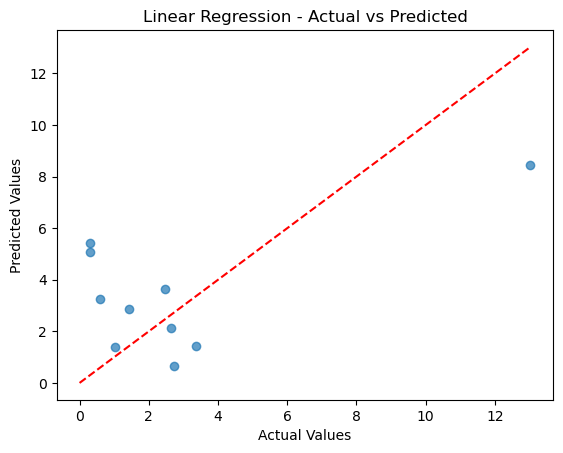

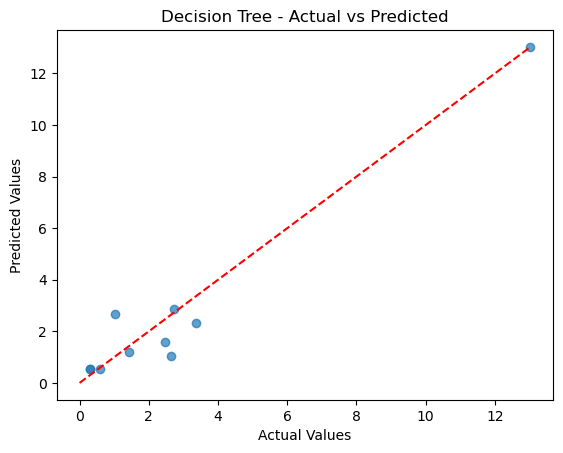

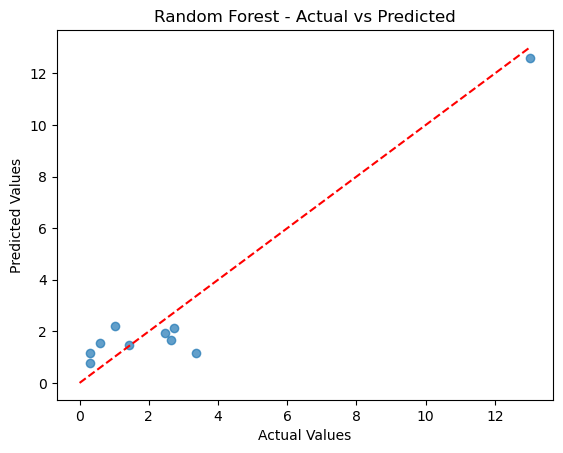

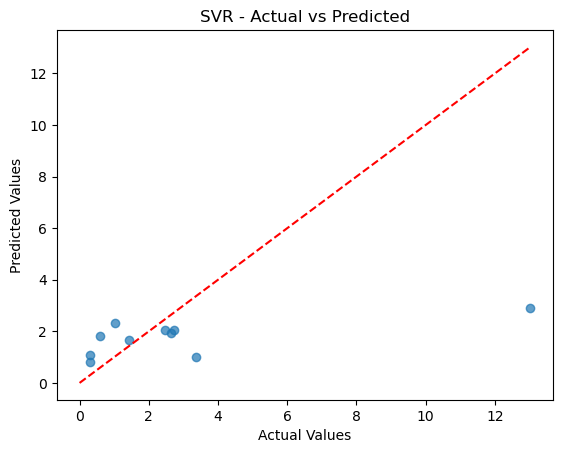

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Function to create scatter plots
def plot_scatter(y_true, y_pred, model_name):
    plt.scatter(y_true, y_pred, alpha=0.7)
    plt.plot(np.linspace(0, max(y_true), 100), np.linspace(0, max(y_true), 100), 'r--')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

# Plot for Linear Regression
plot_scatter(y_test_ra, models['Linear Regression'].predict(X_test_scaled), 'Linear Regression')

# Plot for Decision Tree
plot_scatter(y_test_ra, models['Decision Tree'].predict(X_test_scaled), 'Decision Tree')

# Plot for Random Forest
plot_scatter(y_test_ra, models['Random Forest'].predict(X_test_scaled), 'Random Forest')

# Plot for SVR
plot_scatter(y_test_ra, models['SVR'].predict(X_test_scaled), 'SVR')


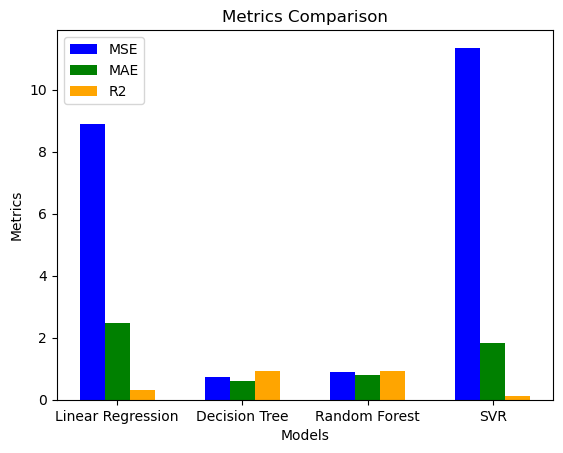

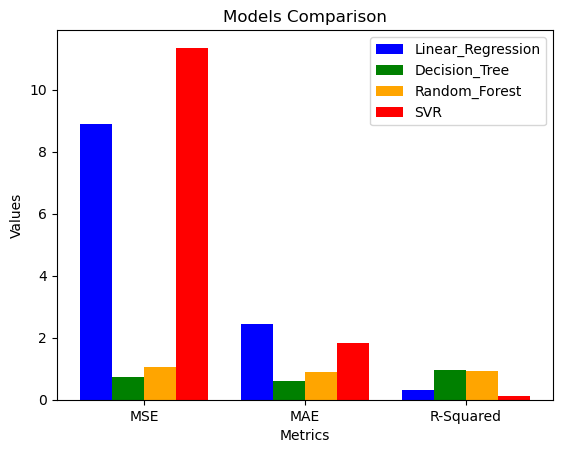

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Results
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
mse_values = [8.89, 0.72, 0.91, 11.35]
mae_values = [2.46, 0.59, 0.81, 1.84]
r2_values = [0.30, 0.94, 0.93, 0.11]

metrics_names = ['MSE', 'MAE', 'R-Squared']
Linear_Regression = [8.886942452513177, 2.456394944069406, 0.30293556719132797]
Decision_Tree = [0.7178069999999999, 0.5946, 0.9436974266464845]
Random_Forest = [1.045909356892501, 0.8853845000000012, 0.9179620869013978]
SVR = [11.346765028438803, 1.8381830747766634, 0.10999464990062713]

# Bar width
bar_width = 0.2
index_metric = np.arange(len(metrics_names))
index_model = np.arange(len(model_names))

# Plotting for Model Metrics
plt.bar(index_model - bar_width, mse_values, bar_width, label='MSE', color='blue')
plt.bar(index_model, mae_values, bar_width, label='MAE', color='green')
plt.bar(index_model + bar_width, r2_values, bar_width, label='R2', color='orange')

# Adding labels for Model Metrics
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Metrics Comparison')
plt.xticks(index_model, model_names)
plt.legend()
plt.show()

# Plotting for Model Names
plt.bar(index_metric - 1.5 * bar_width, Linear_Regression, bar_width, label='Linear_Regression', color='blue')
plt.bar(index_metric - 0.5 * bar_width, Decision_Tree, bar_width, label='Decision_Tree', color='green')
plt.bar(index_metric + 0.5 * bar_width, Random_Forest, bar_width, label='Random_Forest', color='orange')
plt.bar(index_metric + 1.5 * bar_width, SVR, bar_width, label='SVR', color='red')

# Adding labels for Model Names
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Models Comparison')
plt.xticks(index_metric, metrics_names)
plt.legend()
plt.show()


In [13]:
import cv2
import numpy as np
import tkinter as tk
from tkinter import filedialog
import os

def click_event(event, x, y, flags, params):
    global points
    global distances
    global pairs_count

    if event == cv2.EVENT_LBUTTONDOWN:
        print(x, ' ', y)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' + str(y), (x, y), font, 1, (255, 0, 0), 2)
        cv2.imshow('image', img)
        points.append((x, y))

        # Calculate distance if two points are selected
        if len(points) == 2:
            distance = np.linalg.norm(np.array(points[0]) - np.array(points[1]))
            distances.append(distance)
            print(f"Distance between the two points: {distance}")
            points = []  # Clear points for the next pair
            pairs_count += 1

            # If five pairs of points are selected, calculate and print the average distance
            if pairs_count == 5:
                avg_distance = sum(distances) / len(distances)
                print(f"Avg Distance: {avg_distance}")
                cv2.destroyAllWindows()  # Close the window after calculating for five pairs

def select_image():
    root = tk.Tk()
    root.withdraw()  # Hide the main window

    # Ask the user to select an image file
    file_path = filedialog.askopenfilename(title="Select an image file", filetypes=[("Image files", "*.jpg;*.png")])

    return file_path

if __name__ == '__main__':
    points = []       # List to store clicked points
    distances = []    # List to store distances between pairs of points
    pairs_count = 0   # Counter for the number of pairs

    while True:
        # Ask the user to select an image
        img_path = select_image()

        if not img_path:
            break  # If the user cancels or closes the file dialog, exit the loop

        # Load the selected image
        img = cv2.imread(img_path, 1)
        cv2.imshow('image', img)
        cv2.setMouseCallback('image', click_event)

        while pairs_count < 5:
            cv2.waitKey(1)  # Use a small delay to allow the window to refresh

        pairs_count = 0  # Reset pairs count for the next image
